In [4]:
import pandas as pd

data = pd.read_csv('data_without_null')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [6]:
JR = data.loc[(data['SUBDIVISION'] == 'JHARKHAND')]
JR.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
770,JHARKHAND,1901,92.7,66.6,11.1,18.4,33.5,70.9,269.4,415.1,248.0,37.3,11.5,0.0,1274.5,159.3,63.0,1003.4,48.8
771,JHARKHAND,1902,4.2,7.7,13.2,28.5,59.8,89.9,456.1,204.9,306.6,17.6,5.9,3.2,1197.6,11.9,101.5,1057.5,26.7
772,JHARKHAND,1903,25.1,19.5,10.7,32.8,56.4,142.1,206.1,280.8,190.2,210.1,0.5,0.0,1174.3,44.6,99.9,819.3,210.6
773,JHARKHAND,1904,2.5,17.0,38.1,9.1,116.1,308.9,494.1,336.1,125.6,30.6,2.3,0.4,1480.7,19.6,163.3,1264.6,33.3
774,JHARKHAND,1905,38.4,53.3,61.6,32.9,66.2,41.5,420.3,293.7,322.8,21.3,0.0,2.7,1354.7,91.7,160.7,1078.3,24.0


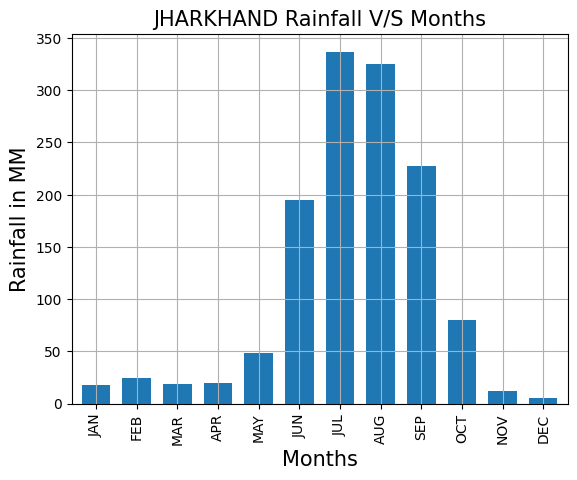

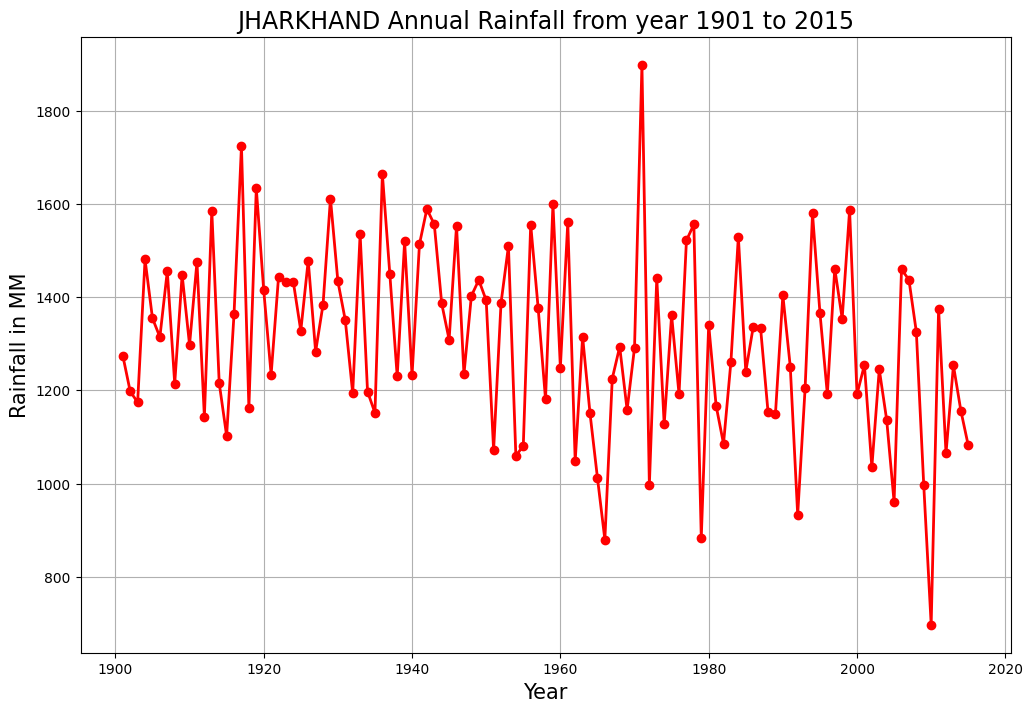

In [7]:
import matplotlib.pyplot as plt

JR[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']].mean().plot(kind="bar",width=0.7,linewidth=3)
plt.title("JHARKHAND Rainfall V/S Months",size=15)
plt.xlabel("Months",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid(axis="both",linestyle="-")
plt.show()

JR.groupby("YEAR").sum()['ANNUAL'].plot(color='r',marker="o",linestyle='-',linewidth=2,figsize=(12,8))
plt.title("JHARKHAND Annual Rainfall from year 1901 to 2015",size=17)
plt.xlabel("Year",size=15)
plt.ylabel("Rainfall in MM",size=15)
plt.grid()
plt.show()

In [8]:
group = data.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
data = group.get_group(('JHARKHAND'))

df = data.melt(['YEAR']).reset_index()

df = df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])

df.columns=['Index','Year','Month','Avg Rainfall']

monthMap = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
df['Month'] = df['Month'].map(monthMap)

df.drop(columns="Index",inplace=True)

df.head(10)

,Year,Month,Avg Rainfall
0,1901,1,92.7
115,1901,2,66.6
230,1901,3,11.1
345,1901,4,18.4
460,1901,5,33.5
575,1901,6,70.9
690,1901,7,269.4
805,1901,8,415.1
920,1901,9,248.0
1035,1901,10,37.3


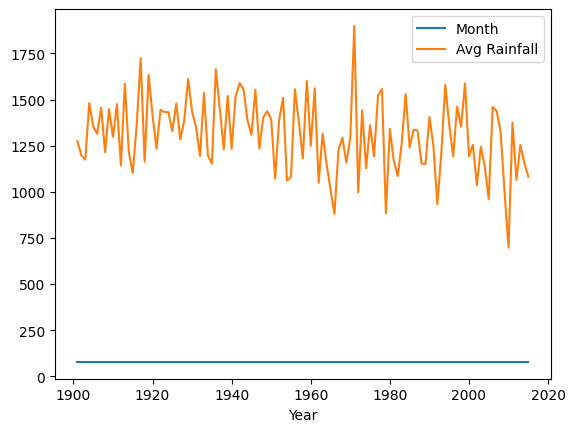

In [9]:
df.groupby("Year").sum().plot()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_19192\4153292416.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg Rainfall'])


<Axes: ylabel='Avg Rainfall'>

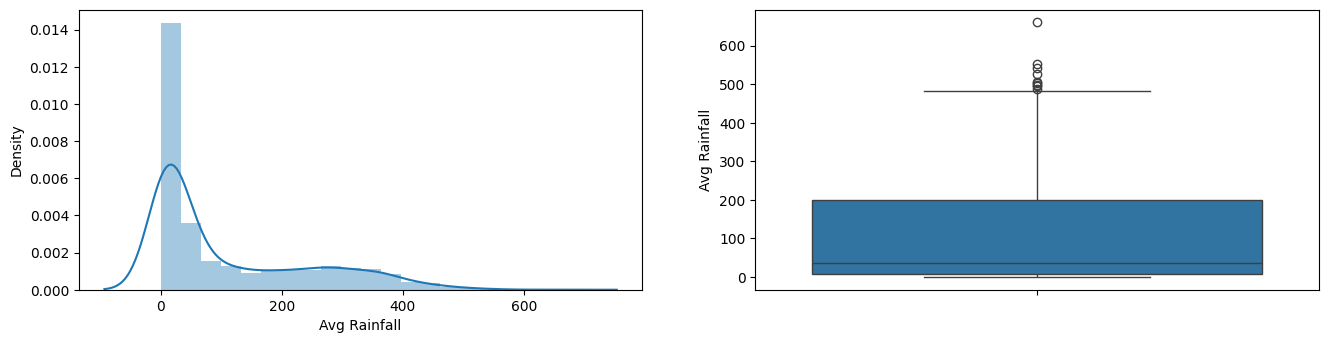

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(df['Avg Rainfall'])

In [11]:
percentile25 = df['Avg Rainfall'].quantile(0.25)
percentile75 = df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df[df['Avg Rainfall'] > upper_limit]
df[df['Avg Rainfall'] < lower_limit]

new_df = df[df['Avg Rainfall'] < upper_limit]
new_df.shape

(1371, 3)

In [12]:
percentile25 = new_df['Avg Rainfall'].quantile(0.25)
percentile75 = new_df['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df[new_df['Avg Rainfall'] > upper_limit]
new_df[new_df['Avg Rainfall'] < lower_limit]

new_df2 = new_df[new_df['Avg Rainfall'] < upper_limit]
new_df2.shape

(1366, 3)

In [13]:
percentile25 = new_df2['Avg Rainfall'].quantile(0.25)
percentile75 = new_df2['Avg Rainfall'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_df2[new_df2['Avg Rainfall'] > upper_limit]
new_df2[new_df2['Avg Rainfall'] < lower_limit]

new_df3 = new_df2[new_df2['Avg Rainfall'] < upper_limit]
new_df3.shape

(1364, 3)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19192\1473949475.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['Avg Rainfall'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19192\1473949475.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3['Avg Rainfall'])


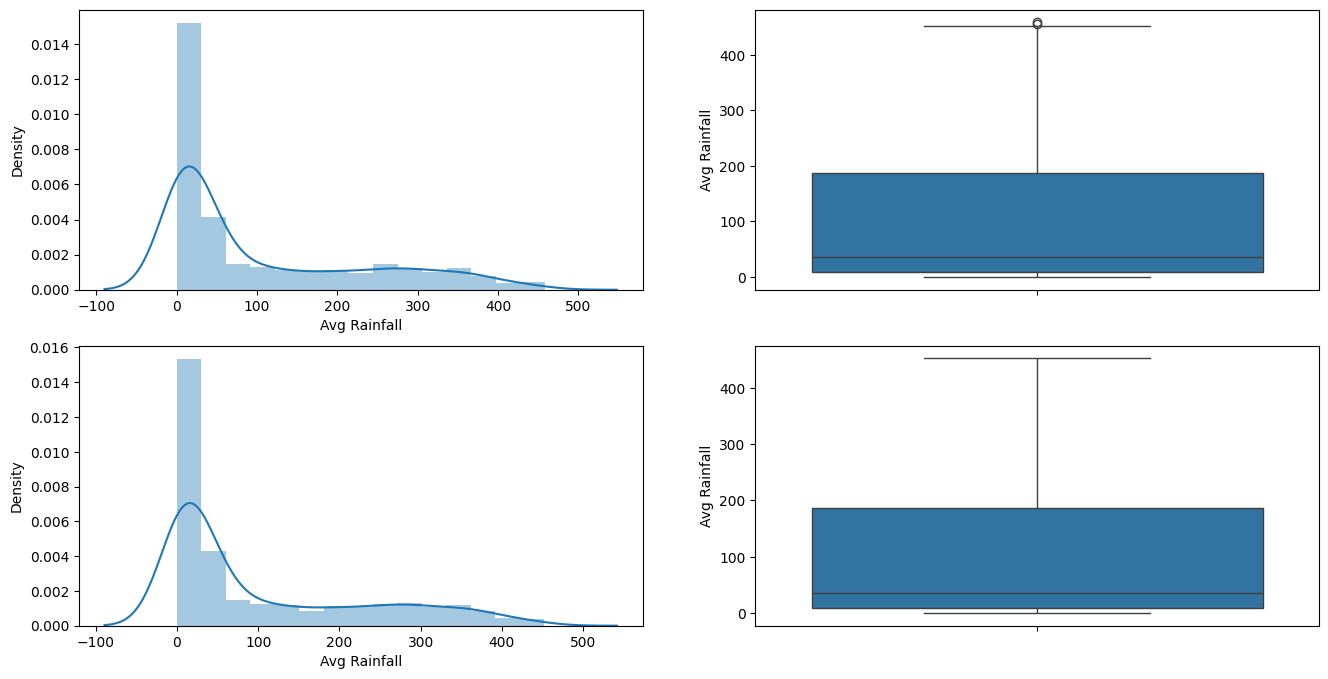

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df2['Avg Rainfall'])
plt.subplot(2,2,2)
sns.boxplot(new_df2['Avg Rainfall'])

plt.subplot(2,2,3)
sns.distplot(new_df3['Avg Rainfall'])
plt.subplot(2,2,4)
sns.boxplot(new_df3['Avg Rainfall'])
plt.show()

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asanyarray(new_df3[['Year','Month']]).astype('int')
Y = np.asanyarray(new_df3['Avg Rainfall']).astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X.shape)
print(Y.shape)

(1364, 2)
(1364,)


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, Y_train)

y_train_predict = knn_model.predict(X_train)
y_test_predict = knn_model.predict(X_test)

predicted = knn_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value : ", predicted)

R-squared score on training data: 0.8353253077551555
R-squared score on test data: 0.7549728408317127
Predicted value :  [36.]


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

random_forest_model = RandomForestRegressor(n_estimators=50, random_state=45)
random_forest_model.fit(X_train, Y_train)

y_train_predict = random_forest_model.predict(X_train)
y_test_predict = random_forest_model.predict(X_test)

predicted = random_forest_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value ", predicted)

R-squared score on training data: 0.9670931253466353
R-squared score on test data: 0.8102657730337115
Predicted value  [60.16]


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_train_predict = linear_model.predict(X_train)
y_test_predict = linear_model.predict(X_test)

predicted = linear_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)
test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted)

R-squared score on training data: 0.042500550573389306
R-squared score on test data: 0.02133012251789035
Predicted value: [61.45121992]


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

decision_tree_model = DecisionTreeRegressor(random_state=45)
decision_tree_model.fit(X_train, Y_train)

y_train_predict = decision_tree_model.predict(X_train)
y_test_predict = decision_tree_model.predict(X_test)

predicted = decision_tree_model.predict([[1901, 1]])

train_r2_score = r2_score(Y_train, y_train_predict)

test_r2_score = r2_score(Y_test, y_test_predict)

print("R-squared score on training data:", train_r2_score)
print("R-squared score on test data:", test_r2_score)
print("Predicted value:", predicted[0])

R-squared score on training data: 1.0
R-squared score on test data: 0.7584919691546474
Predicted value: 92.0


In [21]:
import pickle

pickle.dump(decision_tree_model,open('jr_decesion_tree_model.pkl','wb'))
pickel_model = pickle.load(open('jr_decesion_tree_model.pkl','rb'))

pickel_model.predict([[1901, 1]])

array([92.])